In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from patsy import dmatrix
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, RobustScaler


In [2]:
df = pd.read_csv('~/src/properties_2016.csv')

/Users/quartz/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train_2016_df = pd.read_csv('~/src/train_2016.csv')

In [4]:
train_2016_df.tail()

,parcelid,logerror,transactiondate
90270,10774160,-0.0356,2016-12-30
90271,12046695,0.0070,2016-12-30
90272,12995401,-0.2679,2016-12-30
90273,11402105,0.0602,2016-12-30
90274,12566293,0.4207,2016-12-30


In [5]:
submission_df = pd.read_csv('/Users/quartz/src/sample_submission.csv')
submission_df.tail()

,ParcelId,201610,201611,201612,201710,201711,201712
2985212,168176230,0,0,0,0,0,0
2985213,14273630,0,0,0,0,0,0
2985214,168040630,0,0,0,0,0,0
2985215,168040830,0,0,0,0,0,0
2985216,168040430,0,0,0,0,0,0


In [67]:
# 다항회귀와 결정 계수(R^2)의 관계를 볼 수 있는 프로그램(I(x**2) + ...)
def multiregression(feature, N):

    def checker(feature, N):
        formula = 'logerror ~ '    
        for i in range(1, N):
            formula += "scale(I(" + feature + "**" + str(i) + ")) + "
        formula = formula[:-3]

        model = sm.OLS.from_formula(formula, data=result_df)
        result = model.fit()
        return result.rsquared, result.condition_number

    rscore = []
    condition = []

    for i in range(2, N + 2):
        r, c = checker(feature, i)
        print(r, c)
        rscore.append(r)
        condition.append(c)

    y1 = rscore
    y2 = condition

    plt.subplot(211)
    plt.plot(y1)

    plt.subplot(212)
    plt.plot(y2)

    plt.xticks(np.arange(1, N))
    plt.show()

In [175]:
# 변수변환과 결정 계수(R^2)의 관계를 볼 수 있는 프로그램(log)

def multiregression_log(feature, dataset):

    rscore = []
    condition = []

    formula = 'logerror ~ scale(' + feature + ')'
    model_origin = sm.OLS.from_formula(formula, data=dataset)
    result_origin = model_origin.fit()
    rscore.append(result_origin.rsquared)
    condition.append(result_origin.condition_number)
    print("origin : ", result_origin.rsquared, result_origin.condition_number)
    
    formula = 'logerror ~ scale(np.log(' + feature + '))'
    model_origin = sm.OLS.from_formula(formula, data=dataset)
    result_origin = model_origin.fit()
    rscore.append(result_origin.rsquared)
    condition.append(result_origin.condition_number)
    print("log : ", result_origin.rsquared, result_origin.condition_number)

    formula = 'logerror ~ scale(np.log(' + feature + ')) + scale(np.log(I(' + feature + '**2)))'
    model_origin = sm.OLS.from_formula(formula, data=dataset)
    result_origin = model_origin.fit()
    rscore.append(result_origin.rsquared)
    condition.append(result_origin.condition_number)
    print("log2 : ", result_origin.rsquared, result_origin.condition_number)
    
    y1 = rscore
    y2 = condition

    plt.subplot(211)
    plt.plot(y1)

    plt.subplot(212)
    plt.plot(y2)

    plt.xticks(np.arange(1, 3))
    plt.show()

In [68]:
def checker(feature, N):
    formula = 'logerror ~ '
    for i in range(1, N):
        formula += "scale(np.log(I(" + feature + "**" + str(i) + "))) + "
    formula = formula[:-3]
    print(formula)

    model = sm.OLS.from_formula(formula, data=result_df)
    result = model.fit()
    return result.rsquared, result.condition_number

In [69]:
formula = 'logerror ~ scale(np.log(I(taxamount**4)))'
model = sm.OLS.from_formula(formula, data=result_df)
result = model.fit()
print(result.rsquared, result.condition_number)

0.000791469888978 1.0


In [28]:
checker('taxamount', 5)

logerror ~ scale(np.log(I(taxamount**1))) + scale(np.log(I(taxamount**2))) + scale(np.log(I(taxamount**3))) + scale(np.log(I(taxamount**4)))


(0.00079146988897815795, 16065913972706468.0)

In [27]:
checker('taxamount', 2)

logerror ~ scale(np.log(I(taxamount**1)))


(0.00079146988897815795, 1.0000000000000009)

origin :  4.45024961419e-05 1.0
log :  0.000791469888978 1.0
log2 :  0.000791469888978 8.0268418815e+15


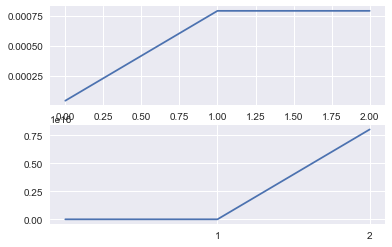

In [34]:
multiregression_log('taxamount')

In [ ]:
# fillna

In [4]:
values = {
    'finishedsquarefeet6' : 1.,
    'finishedsquarefeet12' : 1.,
    'finishedsquarefeet13' : 1.,
    'finishedsquarefeet15' : 1.,
    'structuretaxvaluedollarcnt' : 1.,
    'landtaxvaluedollarcnt' : 1.,
    'calculatedbathnbr' : 1.,
    'calculatedfinishedsquarefeet' : 1827.16,
    'finishedfloor1squarefeet' : 1380.63,
    'poolcnt' : 1.0,
    'taxvaluedollarcnt' : 420478.99,
    'taxamount' : 5377.61,
    'basementsqft': 646.88,
    'bathroomcnt': 2.21,
    'bedroomcnt': 3.09,
    'threequarterbathnbr' : 1.0,
    'finishedsquarefeet50' : 1388.94,
    'fireplacecnt' : 1.17,
    'fullbathcnt' : 2.0,
    'garagecarcnt' : 2.0,
    'garagetotalsqft' : 383.77,
    'lotsizesquarefeet' : 22822.81,
    'numberofstories' : 1.0,
    'poolsizesum' : 519.71,
    'roomcnt' : 1.0,
    'unitcnt' : 1.0,
    'yardbuildingsqft17' : 319.80,
    'yardbuildingsqft26' : 278.30,
}

values

{'finishedsquarefeet6': 1.0,
 'finishedsquarefeet12': 1.0,
 'finishedsquarefeet13': 1.0,
 'finishedsquarefeet15': 1.0,
 'structuretaxvaluedollarcnt': 1.0,
 'landtaxvaluedollarcnt': 1.0,
 'calculatedbathnbr': 1.0,
 'calculatedfinishedsquarefeet': 1827.16,
 'finishedfloor1squarefeet': 1380.63,
 'poolcnt': 1.0,
 'taxvaluedollarcnt': 420478.99,
 'taxamount': 5377.61,
 'basementsqft': 646.88,
 'bathroomcnt': 2.21,
 'bedroomcnt': 3.09,
 'threequarterbathnbr': 1.0,
 'finishedsquarefeet50': 1388.94,
 'fireplacecnt': 1.17,
 'fullbathcnt': 2.0,
 'garagecarcnt': 2.0,
 'garagetotalsqft': 383.77,
 'lotsizesquarefeet': 22822.81,
 'numberofstories': 1.0,
 'poolsizesum': 519.71,
 'roomcnt': 1.0,
 'unitcnt': 1.0,
 'yardbuildingsqft17': 319.8,
 'yardbuildingsqft26': 278.3}

In [5]:
df.fillna(values, inplace=True)
df.tail()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
2985212,168176230,NaN,NaN,646.88,2.21,3.09,NaN,NaN,1.0,NaN,...,1.0,NaN,1.0,420478.99,NaN,1.0,5377.61,NaN,NaN,NaN
2985213,14273630,NaN,NaN,646.88,2.21,3.09,NaN,NaN,1.0,NaN,...,1.0,NaN,1.0,420478.99,NaN,1.0,5377.61,NaN,NaN,NaN
2985214,168040630,NaN,NaN,646.88,2.21,3.09,NaN,NaN,1.0,NaN,...,1.0,NaN,1.0,420478.99,NaN,1.0,5377.61,NaN,NaN,NaN
2985215,168040830,NaN,NaN,646.88,2.21,3.09,NaN,NaN,1.0,NaN,...,1.0,NaN,1.0,420478.99,NaN,1.0,5377.61,NaN,NaN,NaN
2985216,168040430,NaN,NaN,646.88,2.21,3.09,NaN,NaN,1.0,NaN,...,1.0,NaN,1.0,420478.99,NaN,1.0,5377.61,NaN,NaN,NaN


In [6]:
cat = ['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid', 'buildingqualitytypeid', \
       'buildingclasstypeid', 'decktypeid', 'fips', 'hashottuborspa', 'heatingorsystemtypeid', \
       'propertycountylandusecode', 'propertylandusetypeid', 'propertyzoningdesc', \
       'pooltypeid10', 'pooltypeid2', 'pooltypeid7', \
       'rawcensustractandblock', 'censustractandblock', 'regionidcounty', 'regionidcity', \
       'regionidzip', 'regionidneighborhood', 'typeconstructiontypeid', 'yearbuilt', \
       'assessmentyear', 'taxdelinquencyyear', 'fireplaceflag', 'storytypeid', 'taxdelinquencyflag']
cat

['parcelid',
 'airconditioningtypeid',
 'architecturalstyletypeid',
 'buildingqualitytypeid',
 'buildingclasstypeid',
 'decktypeid',
 'fips',
 'hashottuborspa',
 'heatingorsystemtypeid',
 'propertycountylandusecode',
 'propertylandusetypeid',
 'propertyzoningdesc',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'rawcensustractandblock',
 'censustractandblock',
 'regionidcounty',
 'regionidcity',
 'regionidzip',
 'regionidneighborhood',
 'typeconstructiontypeid',
 'yearbuilt',
 'assessmentyear',
 'taxdelinquencyyear',
 'fireplaceflag',
 'storytypeid',
 'taxdelinquencyflag']

In [7]:
values = {}
for i in cat:
    values[i] = "nulls"
df.fillna(values, inplace=True)
df.tail()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
2985212,168176230,nulls,nulls,646.88,2.21,3.09,nulls,nulls,1.0,nulls,...,1.0,nulls,1.0,420478.99,nulls,1.0,5377.61,nulls,nulls,nulls
2985213,14273630,nulls,nulls,646.88,2.21,3.09,nulls,nulls,1.0,nulls,...,1.0,nulls,1.0,420478.99,nulls,1.0,5377.61,nulls,nulls,nulls
2985214,168040630,nulls,nulls,646.88,2.21,3.09,nulls,nulls,1.0,nulls,...,1.0,nulls,1.0,420478.99,nulls,1.0,5377.61,nulls,nulls,nulls
2985215,168040830,nulls,nulls,646.88,2.21,3.09,nulls,nulls,1.0,nulls,...,1.0,nulls,1.0,420478.99,nulls,1.0,5377.61,nulls,nulls,nulls
2985216,168040430,nulls,nulls,646.88,2.21,3.09,nulls,nulls,1.0,nulls,...,1.0,nulls,1.0,420478.99,nulls,1.0,5377.61,nulls,nulls,nulls


In [8]:
df.isna().sum()

parcelid                            0
airconditioningtypeid               0
architecturalstyletypeid            0
basementsqft                        0
bathroomcnt                         0
bedroomcnt                          0
buildingclasstypeid                 0
buildingqualitytypeid               0
calculatedbathnbr                   0
decktypeid                          0
finishedfloor1squarefeet            0
calculatedfinishedsquarefeet        0
finishedsquarefeet12                0
finishedsquarefeet13                0
finishedsquarefeet15                0
finishedsquarefeet50                0
finishedsquarefeet6                 0
fips                                0
fireplacecnt                        0
fullbathcnt                         0
garagecarcnt                        0
garagetotalsqft                     0
hashottuborspa                      0
heatingorsystemtypeid               0
latitude                        11437
longitude                       11437
lotsizesquar

In [ ]:
# result_df 만들기

In [9]:
result_df = pd.merge(df, train_2016_df)
result_df.tail()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
90270,11876798,1,nulls,646.88,3.0,4.0,nulls,4,3.0,nulls,...,388582.0,596082.0,2015,207500.0,7335.81,nulls,nulls,6.0372e+13,0.0276,2016-04-15
90271,12808516,nulls,nulls,646.88,2.0,3.0,nulls,7,2.0,nulls,...,86209.0,178408.0,2015,92199.0,2441.74,nulls,nulls,6.03741e+13,-0.1188,2016-06-07
90272,12010248,1,nulls,646.88,2.0,2.0,nulls,4,2.0,nulls,...,129000.0,420000.0,2015,291000.0,5070.41,nulls,nulls,6.03719e+13,0.0843,2016-06-30
90273,14310905,nulls,nulls,646.88,2.5,3.0,nulls,nulls,2.5,nulls,...,389474.0,1215816.0,2015,826342.0,12508.30,nulls,nulls,nulls,-0.0050,2016-03-31
90274,14636609,nulls,nulls,646.88,2.5,3.0,nulls,nulls,2.5,nulls,...,237048.0,471286.0,2015,234238.0,5470.12,nulls,nulls,nulls,0.0129,2016-09-13


In [ ]:
train_2016_df.iloc[:, 1:2].tail()

In [ ]:
len(e_df)

In [ ]:
np.mean(e_df.values), np.std(e_df.values)

In [ ]:
def norm_test(df, length, a=-10, b=10):
    y1 = df.values
    z1 = sp.stats.zscore(y1)

    N = length
    x1 = sp.stats.norm(0, 1).rvs(N)
    z2 = sp.stats.zscore(x1)

    z3 = sp.stats.ks_2samp(z1, z2)
    
    np.random.seed(0)
    plt.xlim([a, b])
    sns.distplot(z1)
    sns.distplot(z2)
    plt.show()

    return np.mean(z1), np.mean(z2), np.std(z1), np.std(z2), z3

In [ ]:
z = sp.stats.zscore(e_df)
np.mean(z), np.std(z)

In [ ]:
plt.subplot(211)
sns.distplot(e_df)
plt.show()

plt.subplot(212)
sns.distplot(z)
plt.show()

In [ ]:
sns.distplot(z)
plt.xlim([-5, 5])
plt.show()

## _Datatype_

In [ ]:
y = result_df['bathroomcnt'].values
sns.distplot(y)
plt.xlim([0, 7])
plt.plot()

In [ ]:
y = df['bathroomcnt'].values
sns.distplot(y)
plt.xlim([0, 7])
plt.plot()

In [ ]:
y = result_df['bedroomcnt'].values
sns.distplot(y)
# plt.xlim([0, 7])
plt.plot()

In [ ]:
y = df['bedroomcnt'].values
sns.distplot(y ** 2)
# plt.xlim([0, 7])
plt.plot()

In [ ]:
a = 1

In [ ]:
# taxvaluedollarcnt

In [ ]:
y = df['structuretaxvaluedollarcnt'].values
sns.distplot(y)
plt.xlim(0, 10000000)
plt.plot()


In [ ]:
formula = 'logerror ~ scale(structuretaxvaluedollarcnt)'
model = sm.OLS.from_formula(formula, data=result_df)
result = model.fit()

print(result.rsquared)
print(result.summary())

In [ ]:
formula = 'logerror ~ scale(np.log(structuretaxvaluedollarcnt))'
model = sm.OLS.from_formula(formula, data=result_df)
result = model.fit()

print(result.rsquared)
print(result.summary())

In [ ]:
multiregression("structuretaxvaluedollarcnt", 7)

In [16]:
# before

formula = 'logerror ~ scale(bathroomcnt) + scale(bedroomcnt) \
+ scale(threequarterbathnbr) \
+ scale(finishedsquarefeet6) + scale(finishedsquarefeet12) \
+ scale(finishedsquarefeet13) + scale(finishedsquarefeet15) + scale(finishedsquarefeet50) \
+ scale(fireplacecnt) + scale(fullbathcnt) + scale(garagecarcnt) + scale(garagetotalsqft) \
+ scale(lotsizesquarefeet) + scale(numberofstories) \
+ scale(roomcnt) + scale(unitcnt) \
+ scale(yardbuildingsqft17) + scale(structuretaxvaluedollarcnt) \
+ scale(landtaxvaluedollarcnt) + scale(taxamount)'
model = sm.OLS.from_formula(formula, data=result_df)
result = model.fit()
print(result.rsquared)
print(result.summary())

0.00467712864236
                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     21.21
Date:                Thu, 05 Jul 2018   Prob (F-statistic):           3.16e-77
Time:                        12:26:49   Log-Likelihood:                 36947.
No. Observations:               90275   AIC:                        -7.385e+04
Df Residuals:                   90254   BIC:                        -7.365e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

bathroomcnt
0.000777812304312 1.0
0.000778205033765 4.84497275628
0.000940090503904 13.1479435543
0.00106107262142 45.109635685
0.0011356659058 192.160806283
0.00116153394452 946.801547977
0.00116212561682 6128.29532076


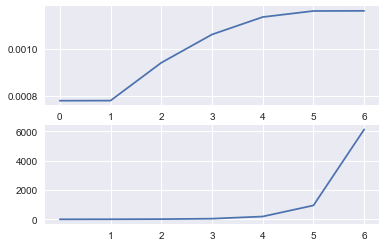

--------------------------------------------------
bedroomcnt
0.000648572676683 1.0
0.000648929453766 5.17487911258
0.000838773649528 18.2147637836
0.000965022790397 62.9965066088
0.000987615402661 267.607922118
0.000988919583208 1287.73887774
0.0010064698449 7211.94225261


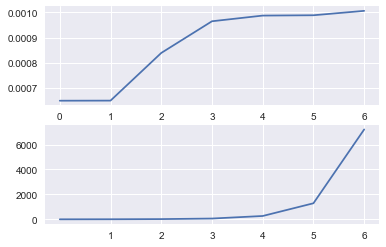

--------------------------------------------------
threequarterbathnbr
0.000121249020415 1.0
0.000126183115475 11.0547692771
0.000137648590411 142.712017747
0.000137437625527 1.93641278899e+14
0.000137201908346 2.69248043574e+14
0.000137366502959 1.4995638724e+15
0.000137294519933 4.21031492948e+15


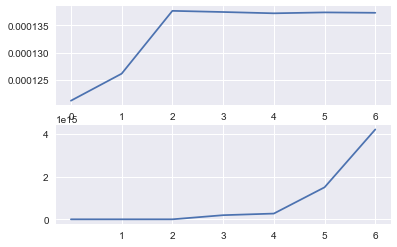

--------------------------------------------------
finishedsquarefeet6
9.99925811836e-05 1.0
0.000219065496521 5.88536297303
0.000222891863834 25.9992397492
0.000243513039946 134.328055025
0.000332180462441 680.409279399
0.000416243096666 3671.28706105
0.000467324741069 22685.7917978


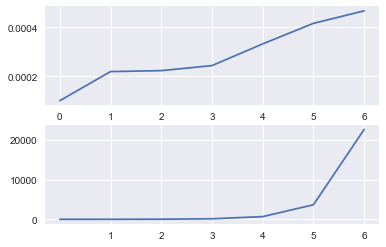

--------------------------------------------------
finishedsquarefeet12
0.00156475856946 1.0
0.00159429545446 3.63581999327
0.00180980244159 10.7447336384
0.00181295326657 38.4591213997
0.0018790578141 166.445142145
0.00190050886882 881.160103959
0.00192399647664 4768.75593817


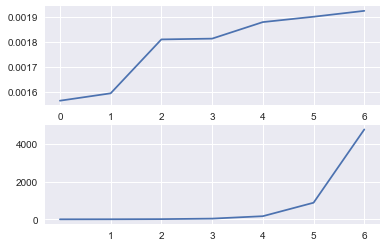

--------------------------------------------------
finishedsquarefeet13
1.36593072619e-05 1.0
1.3743000682e-05 29.2910680849
1.94382003368e-05 488.018896096
2.33824778414e-05 9342.99783404
2.53512476854e-05 249002.596687
3.13607094707e-05 5127418.94942
6.17759252195e-05 118171141.65


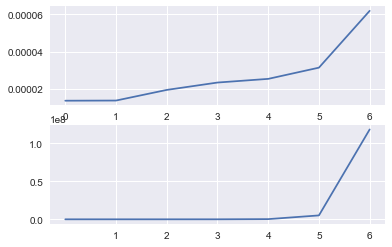

--------------------------------------------------
finishedsquarefeet15
2.75013378737e-09 1.0
2.25695772317e-05 2.74482733182
0.000127967932071 10.316764749
0.000227084483224 116.373256892
0.000227939753568 1611.09430213
0.000330303866594 23293.7023722
0.000436990843539 356677.10419


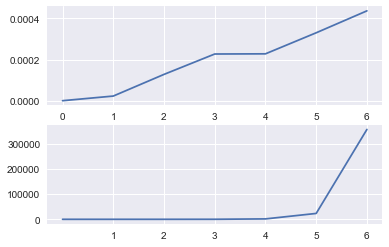

--------------------------------------------------
finishedsquarefeet50
3.14822675315e-05 1.0
7.49037498933e-05 4.27975840215
0.000109623166678 17.388385762
0.000111213185146 89.4232829194
0.000116625193763 446.824434929
0.000135106235101 2338.70181789
0.000156218360381 12914.2900825


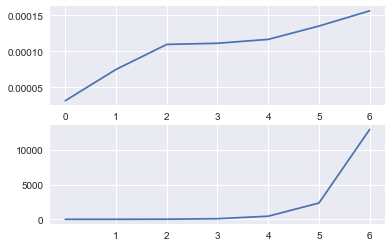

--------------------------------------------------
fireplacecnt
9.64270669501e-05 1.0
0.000106437612856 9.0302200456
0.000106511915103 50.394971024
0.000116201694899 288.409454795
0.000120290445841 1937.87110317
0.000119971387579 4.00906569124e+13
0.000119651745279 8.05036044552e+13


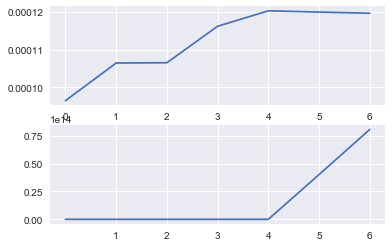

--------------------------------------------------
fullbathcnt
0.000795051654706 1.0
0.000807283784175 5.0746725164
0.000905786457425 14.344304963
0.00102227226788 53.9994804349
0.00110511362836 255.753522347
0.00111799904314 1517.57156852
0.00113201041154 12432.1588827


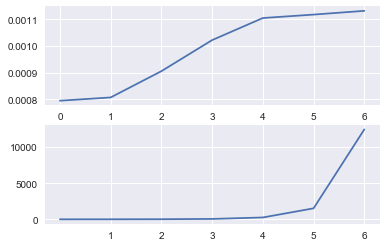

--------------------------------------------------
garagecarcnt
0.000144386813704 1.0
0.000245735682708 2.53315182786
0.000301208009936 9.51192601531
0.000302568089048 63.8646756887
0.000320500044293 516.478135445
0.00055943951969 4140.89554056
0.000610724831511 36983.7137691


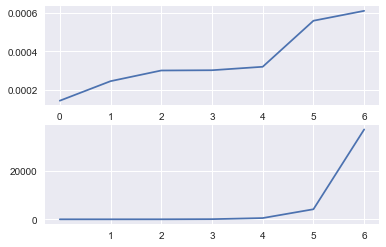

--------------------------------------------------
garagetotalsqft
0.000126249942054 1.0
0.000183409071011 2.02338513814
0.000277843705465 7.16089258663
0.000278618565261 43.704807172
0.000343440091057 362.441120879
0.000459762555913 3841.61979587
0.00051307000753 39478.0004023


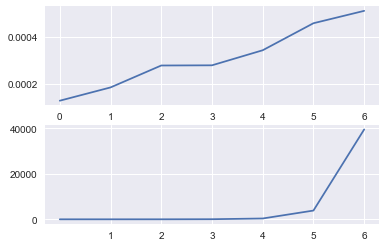

--------------------------------------------------
lotsizesquarefeet
2.28093437959e-05 1.0
2.30081013317e-05 2.71159058782
2.9604483457e-05 17.0995737972
3.0854761332e-05 158.462813424
0.000151696182826 2042.17105052
0.000156971282108 31483.8616984
0.000185662891578 356324.174032


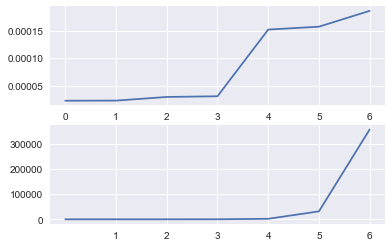

--------------------------------------------------
numberofstories
4.17758538349e-05 1.0
4.22274033807e-05 15.1308506678
4.28689562156e-05 477.474057815
4.28688531094e-05 1.03380247365e+14
4.27749049438e-05 1.24419363317e+14
4.08493216917e-05 7.35179994e+14
4.09651557599e-05 2.11434747637e+16


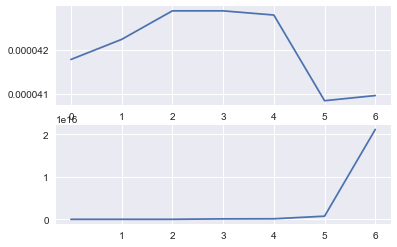

--------------------------------------------------
roomcnt
3.31752526673e-05 1.0
0.000189488273333 8.38421486283
0.000247296200234 49.0093129667
0.00025748266234 215.688117266
0.000300203540315 1011.49414135
0.000318302953288 5190.30462538
0.000340301285266 26894.6876565


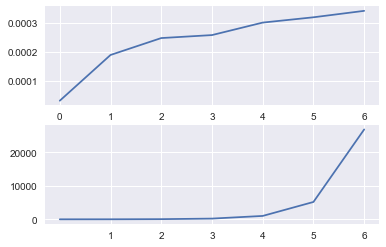

--------------------------------------------------
unitcnt
1.18843163767e-05 1.0
4.10803234623e-05 3.09599064856
4.51851333545e-05 23.0156841092
4.5718603028e-05 1407.46406524
4.5731384112e-05 60775.8054392
5.48075319522e-05 7535586.70232
6.69718668524e-05 414429251.854


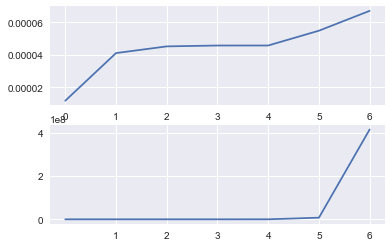

--------------------------------------------------
yardbuildingsqft17
2.11756026697e-05 1.0
2.33042043857e-05 3.59967223939
2.48345349179e-05 13.7892069108
2.84331689597e-05 76.3543419067
2.85094606032e-05 547.389022691
2.96850391253e-05 2962.98631252
3.05915565936e-05 15264.649426


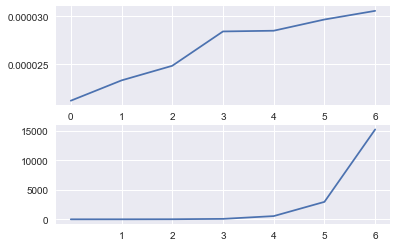

--------------------------------------------------
structuretaxvaluedollarcnt
0.000535512429813 1.0
0.00060349667179 2.4393691708
0.000682843281549 8.6523155054
0.000711164944575 40.4229620674
0.00106209984223 224.830627778
0.00109259203461 1458.63088697
0.00109554224014 10270.4138485


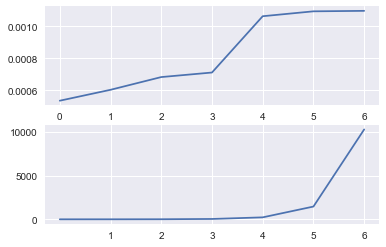

--------------------------------------------------
landtaxvaluedollarcnt
9.21744491267e-06 1.0
1.3368470633e-05 2.22645405232
2.12243650538e-05 8.69522297661
6.97573182888e-05 43.0437009334
7.24789754953e-05 273.321095692
7.35598722104e-05 2156.79130024
8.47052260616e-05 18123.0650243


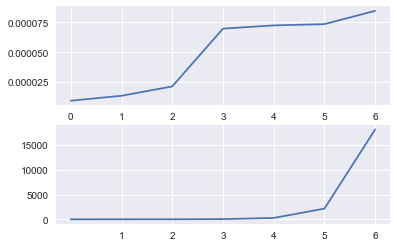

--------------------------------------------------
taxamount
4.45024961419e-05 1.0
5.45302898441e-05 2.36548050704
0.000232030267188 9.89530127902
0.000551346192652 59.4021866789
0.000683034394848 305.411439361
0.000763413640934 1979.42474993
0.00115113369823 10856.5855513


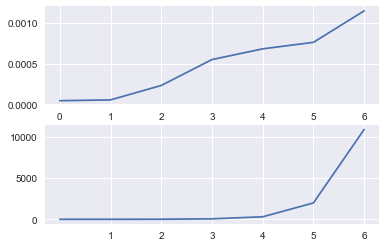

--------------------------------------------------


In [15]:
# features = ['bathroomcnt', 'bedroomcnt', 'calculatedbathnbr', 'threequarterbathnbr', 'calculatedfinishedsquarefeet']

# 1-2. taxvaluedollarcnt, poolcnt : 96.0 
# 3. longitude : 96.0
# 4. latitude : 96.0
# 5. calculatedbathnbr : 31.5
# 6. basementsqft : 31.5
# 7. finishedfloor1squarefeet : 31.3
# 8. poolsizesum : 31.2
# 9. yardbuildingsqft26 : 31.2
# 10. calculatedfinishedsquarefeet : 12.2

features = ['bathroomcnt', 'bedroomcnt', 'threequarterbathnbr', \
       'finishedsquarefeet6', \
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', \
       'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', \
       'lotsizesquarefeet', 'numberofstories', \
       'roomcnt', \
       'unitcnt', 'yardbuildingsqft17', \
       'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount']

for feature in features:
    print(feature)
    multiregression(feature, 7)
    print("-" * 50)

In [ ]:
# poolcnt 그대로 


In [79]:
rests = ['taxvaluedollarcnt', 'calculatedbathnbr', 'basementsqft', \
        'finishedfloor1squarefeet', 'poolsizesum', 'yardbuildingsqft26', \
        'calculatedfinishedsquarefeet']
rests

['taxvaluedollarcnt',
 'calculatedbathnbr',
 'basementsqft',
 'finishedfloor1squarefeet',
 'poolsizesum',
 'yardbuildingsqft26',
 'calculatedfinishedsquarefeet']

taxvaluedollarcnt
4.23710339261e-05 1.0
5.43519293986e-05 2.29948054129
9.15861819082e-05 9.61526030679
0.000112953570345 59.9913052979
0.000194299324808 298.492676427
0.000197603437304 1918.96683179
0.000356065996664 10721.0945886


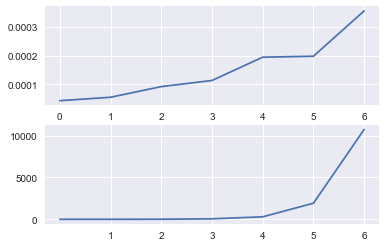

--------------------------------------------------
calculatedbathnbr
0.000790411350788 1.0
0.000790582601249 4.84117573947
0.000947585674493 13.1316100442
0.00106244408377 45.0207274257
0.00114281274328 191.754650865
0.00116532642019 945.113644539
0.00116554287274 6121.5964221


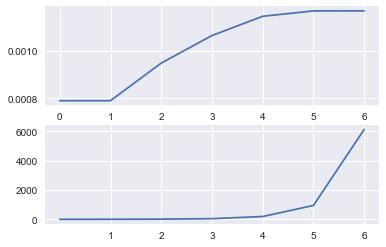

--------------------------------------------------
basementsqft
4.76137914971e-05 1.0
7.35763337006e-05 6.41065286391
9.51813379791e-05 67.0621155669
0.000104164561684 518.344723272
0.000114442871898 3385.38239318
0.000144986067533 24631.4252329
0.000156795428899 147001.134845


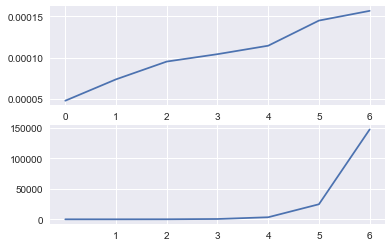

--------------------------------------------------
finishedfloor1squarefeet
3.9497863635e-05 1.0
0.000118604350429 4.60373714351
0.00012469001001 18.7152599106
0.000130839451873 95.5424554675
0.00015007856693 450.565370715
0.000303826642964 1988.20307679
0.000394179821012 11085.5159259


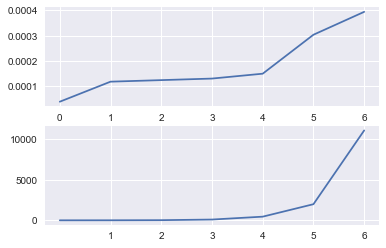

--------------------------------------------------
poolsizesum
9.17895981445e-10 1.0
8.69026844796e-06 5.670183078
9.67992430656e-06 28.4127859188
3.66142591194e-05 192.552106891
4.28445064523e-05 1098.36086759
4.93337886895e-05 9571.13629487
4.95562404009e-05 70334.0851412


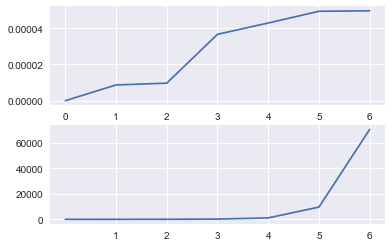

--------------------------------------------------
yardbuildingsqft26
4.6451372574e-06 1.0
3.8122712963e-05 5.97371085071
5.54223896593e-05 34.1941626585
0.000111534064218 242.613205323
0.000119923398647 1407.30910774
0.000126530586656 7002.59552324
0.000131923563371 52084.5604504


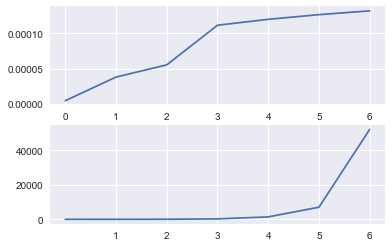

--------------------------------------------------
calculatedfinishedsquarefeet
0.0014672395085 1.0
0.0014767265634 3.88049075138
0.00169554056146 12.1237741811
0.00172833127205 47.3582671046
0.00175576289003 219.570016445
0.0018601292461 1190.02621904
0.0018937618662 7249.69434106


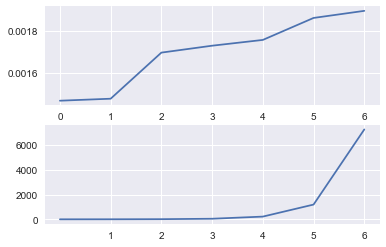

--------------------------------------------------


In [80]:
for rest in rests:
    print(rest)
    multiregression(rest, 7)
    print("-" * 50)

In [ ]:
for rest in rests:
    print(rest)
    multiregression_log(rest)
    print("-" * 50)

In [83]:
formula = 'logerror ~ '    

for feature in rests:
    for i in range(1, 5):
        formula += "scale(I(" + feature + "**" + str(i) + ")) + "
    formula = formula[:-3]
    formula += " + "
formula = formula[:-3]
formula

'logerror ~ scale(I(taxvaluedollarcnt**1)) + scale(I(taxvaluedollarcnt**2)) + scale(I(taxvaluedollarcnt**3)) + scale(I(taxvaluedollarcnt**4)) + scale(I(calculatedbathnbr**1)) + scale(I(calculatedbathnbr**2)) + scale(I(calculatedbathnbr**3)) + scale(I(calculatedbathnbr**4)) + scale(I(basementsqft**1)) + scale(I(basementsqft**2)) + scale(I(basementsqft**3)) + scale(I(basementsqft**4)) + scale(I(finishedfloor1squarefeet**1)) + scale(I(finishedfloor1squarefeet**2)) + scale(I(finishedfloor1squarefeet**3)) + scale(I(finishedfloor1squarefeet**4)) + scale(I(poolsizesum**1)) + scale(I(poolsizesum**2)) + scale(I(poolsizesum**3)) + scale(I(poolsizesum**4)) + scale(I(yardbuildingsqft26**1)) + scale(I(yardbuildingsqft26**2)) + scale(I(yardbuildingsqft26**3)) + scale(I(yardbuildingsqft26**4)) + scale(I(calculatedfinishedsquarefeet**1)) + scale(I(calculatedfinishedsquarefeet**2)) + scale(I(calculatedfinishedsquarefeet**3)) + scale(I(calculatedfinishedsquarefeet**4))'

In [ ]:
'logerror ~ scale(I(taxvaluedollarcnt**1)) + scale(I(taxvaluedollarcnt**2)) + scale(I(taxvaluedollarcnt**3)) + scale(I(taxvaluedollarcnt**4)) \
+ scale(I(calculatedbathnbr**1)) + scale(I(calculatedbathnbr**2)) + scale(I(calculatedbathnbr**3)) \
+ scale(I(basementsqft**1)) + scale(I(basementsqft**2)) + scale(I(basementsqft**3)) \
+ scale(I(finishedfloor1squarefeet**1)) + scale(I(finishedfloor1squarefeet**2)) \
+ scale(I(poolsizesum**1)) + scale(I(poolsizesum**2)) + scale(I(poolsizesum**3)) + scale(I(poolsizesum**4)) \
+ scale(I(yardbuildingsqft26**1)) + scale(I(yardbuildingsqft26**2)) + scale(I(yardbuildingsqft26**3)) + scale(I(yardbuildingsqft26**4)) \
+ scale(I(calculatedfinishedsquarefeet**1)) + scale(I(calculatedfinishedsquarefeet**2)) + scale(I(calculatedfinishedsquarefeet**3))'

In [82]:
# before 다항회귀

formula = 'logerror ~ \
scale(bathroomcnt) + scale(bedroomcnt) \
+ scale(threequarterbathnbr) \
+ scale(finishedsquarefeet6) + scale(finishedsquarefeet12) \
+ scale(finishedsquarefeet13) + scale(finishedsquarefeet15) + scale(finishedsquarefeet50) \
+ scale(fireplacecnt) + scale(fullbathcnt) + scale(garagecarcnt) + scale(garagetotalsqft) \
+ scale(lotsizesquarefeet) + scale(numberofstories) \
+ scale(roomcnt) + scale(unitcnt) \
+ scale(yardbuildingsqft17) + scale(structuretaxvaluedollarcnt) \
+ scale(landtaxvaluedollarcnt) + scale(taxamount) \
+ scale(I(taxvaluedollarcnt**1)) + scale(I(calculatedbathnbr**1)) \
+ scale(I(basementsqft**1)) + scale(I(finishedfloor1squarefeet**1)) \
+ scale(I(poolsizesum**1)) + scale(I(yardbuildingsqft26**1)) \
+ scale(I(calculatedfinishedsquarefeet**1))'
model = sm.OLS.from_formula(formula, data=result_df)
result = model.fit()
print(result.rsquared)
print(result.summary())

0.00480264106037
                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     16.13
Date:                Thu, 05 Jul 2018   Prob (F-statistic):           4.45e-75
Time:                        14:47:07   Log-Likelihood:                 36953.
No. Observations:               90275   AIC:                        -7.385e+04
Df Residuals:                   90247   BIC:                        -7.359e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [ ]:
features

In [17]:
# after

formula = 'logerror ~ '    

for feature in features:
    for i in range(1, 5):
        formula += "scale(I(" + feature + "**" + str(i) + ")) + "
    formula = formula[:-3]
    formula += " + "
formula = formula[:-3]
formula

'logerror ~ scale(I(bathroomcnt**1)) + scale(I(bathroomcnt**2)) + scale(I(bathroomcnt**3)) + scale(I(bathroomcnt**4)) + scale(I(bedroomcnt**1)) + scale(I(bedroomcnt**2)) + scale(I(bedroomcnt**3)) + scale(I(bedroomcnt**4)) + scale(I(threequarterbathnbr**1)) + scale(I(threequarterbathnbr**2)) + scale(I(threequarterbathnbr**3)) + scale(I(threequarterbathnbr**4)) + scale(I(finishedsquarefeet6**1)) + scale(I(finishedsquarefeet6**2)) + scale(I(finishedsquarefeet6**3)) + scale(I(finishedsquarefeet6**4)) + scale(I(finishedsquarefeet12**1)) + scale(I(finishedsquarefeet12**2)) + scale(I(finishedsquarefeet12**3)) + scale(I(finishedsquarefeet12**4)) + scale(I(finishedsquarefeet13**1)) + scale(I(finishedsquarefeet13**2)) + scale(I(finishedsquarefeet13**3)) + scale(I(finishedsquarefeet13**4)) + scale(I(finishedsquarefeet15**1)) + scale(I(finishedsquarefeet15**2)) + scale(I(finishedsquarefeet15**3)) + scale(I(finishedsquarefeet15**4)) + scale(I(finishedsquarefeet50**1)) + scale(I(finishedsquarefeet50

In [84]:
# after 다항회귀

formula = 'logerror ~ \
scale(I(bathroomcnt**1)) + scale(I(bathroomcnt**2)) + scale(I(bathroomcnt**3)) + scale(I(bathroomcnt**4)) \
+ scale(I(bedroomcnt**1)) + scale(I(bedroomcnt**2)) + scale(I(bedroomcnt**3)) + scale(I(bedroomcnt**4)) \
+ scale(I(threequarterbathnbr**1)) + scale(I(threequarterbathnbr**2)) + scale(I(threequarterbathnbr**3)) \
+ scale(I(finishedsquarefeet6**1)) + scale(I(finishedsquarefeet6**2)) \
+ scale(I(finishedsquarefeet12**1)) + scale(I(finishedsquarefeet12**2)) + scale(I(finishedsquarefeet12**3)) \
+ scale(I(finishedsquarefeet13**1)) \
+ scale(I(finishedsquarefeet15**1)) + scale(I(finishedsquarefeet15**2)) + scale(I(finishedsquarefeet15**3)) + scale(I(finishedsquarefeet15**4)) \
+ scale(I(finishedsquarefeet50**1)) + scale(I(finishedsquarefeet50**2)) + scale(I(finishedsquarefeet50**3)) \
+ scale(I(fireplacecnt**1)) + scale(I(fireplacecnt**2)) \
+ scale(I(fullbathcnt**1)) + scale(I(fullbathcnt**2)) + scale(I(fullbathcnt**3)) \
+ scale(I(garagecarcnt**1)) + scale(I(garagecarcnt**2)) + scale(I(garagecarcnt**3)) \
+ scale(I(garagetotalsqft**1)) + scale(I(garagetotalsqft**2)) + scale(I(garagetotalsqft**3)) \
+ scale(lotsizesquarefeet) \
+ scale(I(numberofstories**1)) \
+ scale(I(roomcnt**1)) + scale(I(roomcnt**2)) \
+ scale(I(unitcnt**1)) + scale(I(unitcnt**2)) \
+ scale(I(yardbuildingsqft17**1)) + scale(I(yardbuildingsqft17**2)) + scale(I(yardbuildingsqft17**3)) \
+ scale(I(structuretaxvaluedollarcnt**1)) + scale(I(structuretaxvaluedollarcnt**2)) + scale(I(structuretaxvaluedollarcnt**3)) \
+ scale(I(landtaxvaluedollarcnt**1)) + scale(I(landtaxvaluedollarcnt**2)) + scale(I(landtaxvaluedollarcnt**3)) + scale(I(landtaxvaluedollarcnt**4)) \
+ scale(I(taxamount**1)) \
+ scale(I(taxvaluedollarcnt**1)) + scale(I(taxvaluedollarcnt**2)) + scale(I(taxvaluedollarcnt**3)) + scale(I(taxvaluedollarcnt**4)) \
+ scale(I(calculatedbathnbr**1)) + scale(I(calculatedbathnbr**2)) + scale(I(calculatedbathnbr**3)) \
+ scale(I(basementsqft**1)) + scale(I(basementsqft**2)) + scale(I(basementsqft**3)) \
+ scale(I(finishedfloor1squarefeet**1)) + scale(I(finishedfloor1squarefeet**2)) \
+ scale(I(poolsizesum**1)) + scale(I(poolsizesum**2)) + scale(I(poolsizesum**3)) + scale(I(poolsizesum**4)) \
+ scale(I(yardbuildingsqft26**1)) + scale(I(yardbuildingsqft26**2)) + scale(I(yardbuildingsqft26**3)) + scale(I(yardbuildingsqft26**4)) \
+ scale(I(calculatedfinishedsquarefeet**1)) + scale(I(calculatedfinishedsquarefeet**2)) + scale(I(calculatedfinishedsquarefeet**3))'
model = sm.OLS.from_formula(formula, data=result_df)
result = model.fit()
print(result.rsquared)
print(result.summary())

0.00685565352196
                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     8.302
Date:                Thu, 05 Jul 2018   Prob (F-statistic):           7.24e-87
Time:                        14:51:36   Log-Likelihood:                 37046.
No. Observations:               90275   AIC:                        -7.394e+04
Df Residuals:                   90199   BIC:                        -7.322e+04
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [ ]:
# result_df["landtaxvaluedollarcnt"].replace(to_replace=0.0, value=10.0, inplace=True)
# result_df['landtaxvaluedollarcnt'].value_counts()

/Users/quartz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


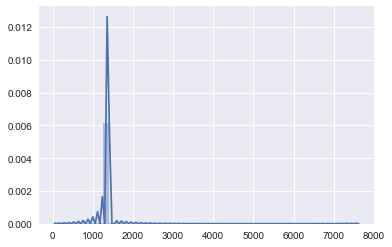

In [44]:
y = result_df['finishedfloor1squarefeet'].values
sns.distplot(np.log(y))
plt.show()


In [52]:
result_df['roomcnt'].value_counts()

0.0     69700
6.0      5353
7.0      4487
5.0      3486
8.0      3410
4.0      1673
9.0      1356
10.0      364
3.0       271
11.0      111
12.0       33
13.0       11
2.0        10
14.0        4
1.0         3
15.0        2
18.0        1
Name: roomcnt, dtype: int64

finishedfloor1squarefeet
origin :  3.9497863635e-05 1.0
log :  6.64472040279e-07 1.0
log2 :  6.64472040279e-07 1.34279127037e+16


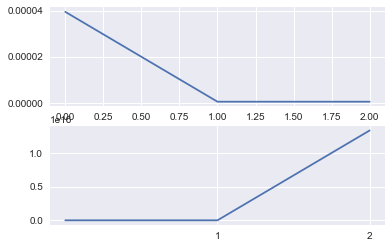

--------------------------------------------------
calculatedfinishedsquarefeet
origin :  0.0014672395085 1.0
log :  0.000825858526375 1.0
log2 :  0.000825858526375 1.06461881852e+16


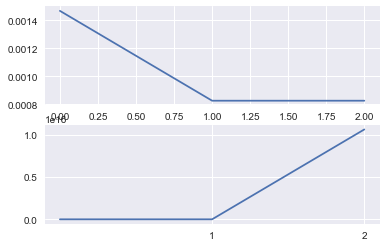

--------------------------------------------------
finishedsquarefeet50
origin :  3.14822675315e-05 1.0
log :  1.66512841959e-07 1.0
log2 :  1.66512841959e-07 1.37491973495e+16


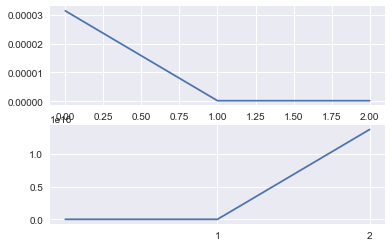

--------------------------------------------------
lotsizesquarefeet
origin :  2.28093437959e-05 1.0
log :  5.77486709706e-05 1.0
log2 :  5.77486709706e-05 1.27750232947e+16


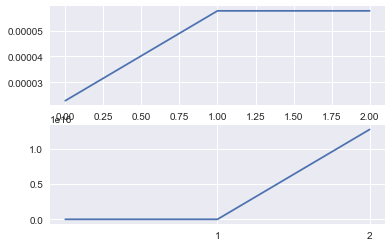

--------------------------------------------------
poolsizesum
origin :  9.17895981445e-10 1.0
log :  1.96978658829e-07 1.0
log2 :  1.96978658829e-07 9.63052470314e+15


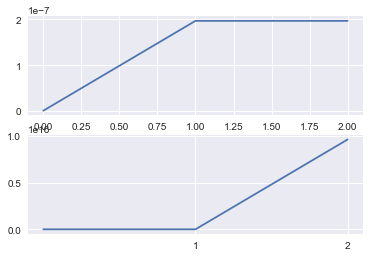

--------------------------------------------------
yardbuildingsqft17
origin :  2.11756026697e-05 1.0
log :  2.7106269026e-05 1.0
log2 :  2.7106269026e-05 2.8217065559e+16


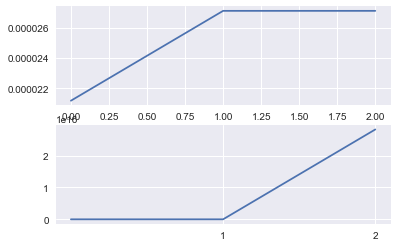

--------------------------------------------------
yardbuildingsqft26
origin :  4.6451372574e-06 1.0
log :  8.72931267437e-06 1.0
log2 :  8.72931267437e-06 2.38084623328e+16


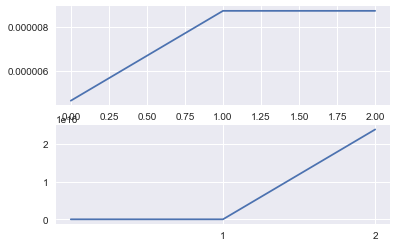

--------------------------------------------------
taxvaluedollarcnt
origin :  4.23710339261e-05 1.0
log :  8.91498384348e-06 1.0
log2 :  8.91498384326e-06 7.79228093701e+15


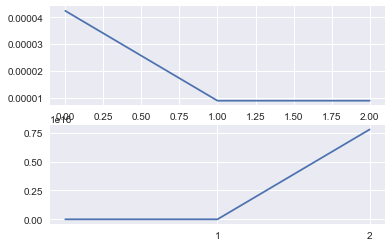

--------------------------------------------------
structuretaxvaluedollarcnt
origin :  0.000535509427942 1.0
log :  0.000306134020753 1.0
log2 :  0.000306134020753 8.53412719505e+15


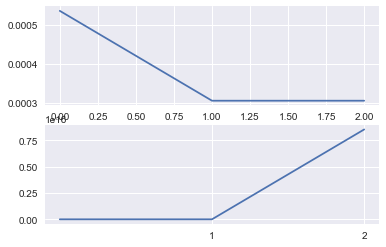

--------------------------------------------------
landtaxvaluedollarcnt
origin :  9.2174481755e-06 1.0
log :  8.31038389639e-05 1.0
log2 :  8.31038389639e-05 1.31227505923e+16


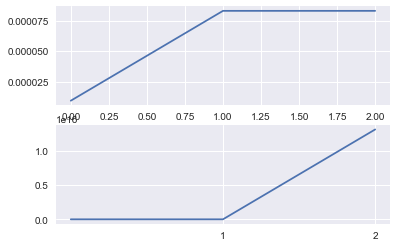

--------------------------------------------------
taxamount
origin :  4.45024961419e-05 1.0
log :  0.000791469888978 1.0
log2 :  0.000791469888978 8.0268418815e+15


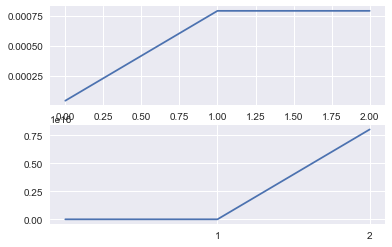

--------------------------------------------------


In [57]:
features2 = ['finishedfloor1squarefeet', 'calculatedfinishedsquarefeet', \
             'finishedsquarefeet50', 'lotsizesquarefeet' ,'poolsizesum', \
             'yardbuildingsqft17', 'yardbuildingsqft26', 'taxvaluedollarcnt', \
             'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount']

for feature in features2:
    print(feature)
    multiregression_log(feature)
    print("-" * 50)

In [85]:
# after 다항회귀 + 변수변환

formula = 'logerror ~ \
scale(I(bathroomcnt**1)) + scale(I(bathroomcnt**2)) + scale(I(bathroomcnt**3)) + scale(I(bathroomcnt**4)) \
+ scale(I(bedroomcnt**1)) + scale(I(bedroomcnt**2)) + scale(I(bedroomcnt**3)) + scale(I(bedroomcnt**4)) \
+ scale(I(threequarterbathnbr**1)) + scale(I(threequarterbathnbr**2)) + scale(I(threequarterbathnbr**3)) \
+ scale(I(finishedsquarefeet6**1)) + scale(I(finishedsquarefeet6**2)) \
+ scale(I(finishedsquarefeet12**1)) + scale(I(finishedsquarefeet12**2)) + scale(I(finishedsquarefeet12**3)) \
+ scale(I(finishedsquarefeet13**1)) \
+ scale(I(finishedsquarefeet15**1)) + scale(I(finishedsquarefeet15**2)) + scale(I(finishedsquarefeet15**3)) + scale(I(finishedsquarefeet15**4)) \
+ scale(I(finishedsquarefeet50**1)) + scale(I(finishedsquarefeet50**2)) + scale(I(finishedsquarefeet50**3)) \
+ scale(I(fireplacecnt**1)) + scale(I(fireplacecnt**2)) \
+ scale(I(fullbathcnt**1)) + scale(I(fullbathcnt**2)) + scale(I(fullbathcnt**3)) \
+ scale(I(garagecarcnt**1)) + scale(I(garagecarcnt**2)) + scale(I(garagecarcnt**3)) \
+ scale(I(garagetotalsqft**1)) + scale(I(garagetotalsqft**2)) + scale(I(garagetotalsqft**3)) \
+ scale(np.log(lotsizesquarefeet)) \
+ scale(I(numberofstories**1)) \
+ scale(I(roomcnt**1)) + scale(I(roomcnt**2)) \
+ scale(I(unitcnt**1)) + scale(I(unitcnt**2)) \
+ scale(I(yardbuildingsqft17**1)) + scale(I(yardbuildingsqft17**2)) + scale(I(yardbuildingsqft17**3)) \
+ scale(I(structuretaxvaluedollarcnt**1)) + scale(I(structuretaxvaluedollarcnt**2)) + scale(I(structuretaxvaluedollarcnt**3)) \
+ scale(I(landtaxvaluedollarcnt**1)) + scale(I(landtaxvaluedollarcnt**2)) + scale(I(landtaxvaluedollarcnt**3)) + scale(I(landtaxvaluedollarcnt**4)) \
+ scale(np.log(taxamount)) \
+ scale(I(taxvaluedollarcnt**1)) + scale(I(taxvaluedollarcnt**2)) + scale(I(taxvaluedollarcnt**3)) + scale(I(taxvaluedollarcnt**4)) \
+ scale(I(calculatedbathnbr**1)) + scale(I(calculatedbathnbr**2)) + scale(I(calculatedbathnbr**3)) \
+ scale(I(basementsqft**1)) + scale(I(basementsqft**2)) + scale(I(basementsqft**3)) \
+ scale(I(finishedfloor1squarefeet**1)) + scale(I(finishedfloor1squarefeet**2)) \
+ scale(I(poolsizesum**1)) + scale(I(poolsizesum**2)) + scale(I(poolsizesum**3)) + scale(I(poolsizesum**4)) \
+ scale(I(yardbuildingsqft26**1)) + scale(I(yardbuildingsqft26**2)) + scale(I(yardbuildingsqft26**3)) + scale(I(yardbuildingsqft26**4)) \
+ scale(I(calculatedfinishedsquarefeet**1)) + scale(I(calculatedfinishedsquarefeet**2)) + scale(I(calculatedfinishedsquarefeet**3))'


model = sm.OLS.from_formula(formula, data=result_df)
result = model.fit()
print(result.rsquared)
print(result.summary())

0.00892286790827
                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     10.83
Date:                Thu, 05 Jul 2018   Prob (F-statistic):          1.63e-123
Time:                        14:54:59   Log-Likelihood:                 37140.
No. Observations:               90275   AIC:                        -7.413e+04
Df Residuals:                   90199   BIC:                        -7.341e+04
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [87]:
# after 다항회귀 + 변수변환*

formula = 'logerror ~ \
scale(I(bathroomcnt**1)) + scale(I(bathroomcnt**2)) + scale(I(bathroomcnt**3)) + scale(I(bathroomcnt**4)) \
+ scale(I(bedroomcnt**1)) + scale(I(bedroomcnt**2)) + scale(I(bedroomcnt**3)) + scale(I(bedroomcnt**4)) \
+ scale(I(threequarterbathnbr**1)) + scale(I(threequarterbathnbr**2)) + scale(I(threequarterbathnbr**3)) \
+ scale(I(finishedsquarefeet6**1)) + scale(I(finishedsquarefeet6**2)) \
+ scale(I(finishedsquarefeet12**1)) + scale(I(finishedsquarefeet12**2)) + scale(I(finishedsquarefeet12**3)) \
+ scale(I(finishedsquarefeet13**1)) \
+ scale(I(finishedsquarefeet15**1)) + scale(I(finishedsquarefeet15**2)) + scale(I(finishedsquarefeet15**3)) + scale(I(finishedsquarefeet15**4)) \
+ scale(I(finishedsquarefeet50**1)) + scale(I(finishedsquarefeet50**2)) + scale(I(finishedsquarefeet50**3)) \
+ scale(I(fireplacecnt**1)) + scale(I(fireplacecnt**2)) \
+ scale(I(fullbathcnt**1)) + scale(I(fullbathcnt**2)) + scale(I(fullbathcnt**3)) \
+ scale(I(garagecarcnt**1)) + scale(I(garagecarcnt**2)) + scale(I(garagecarcnt**3)) \
+ scale(I(garagetotalsqft**1)) + scale(I(garagetotalsqft**2)) + scale(I(garagetotalsqft**3)) \
+ scale(np.log(lotsizesquarefeet)) \
+ scale(I(numberofstories**1)) \
+ scale(I(roomcnt**1)) + scale(I(roomcnt**2)) \
+ scale(I(unitcnt**1)) + scale(I(unitcnt**2)) \
+ scale(np.log(yardbuildingsqft17)) \
+ scale(I(structuretaxvaluedollarcnt**1)) + scale(I(structuretaxvaluedollarcnt**2)) + scale(I(structuretaxvaluedollarcnt**3)) \
+ scale(np.log(landtaxvaluedollarcnt)) \
+ scale(np.log(taxamount)) \
+ scale(np.log(poolsizesum)) \
+ scale(I(taxvaluedollarcnt**1)) + scale(I(taxvaluedollarcnt**2)) + scale(I(taxvaluedollarcnt**3)) + scale(I(taxvaluedollarcnt**4)) \
+ scale(I(calculatedbathnbr**1)) + scale(I(calculatedbathnbr**2)) + scale(I(calculatedbathnbr**3)) \
+ scale(I(basementsqft**1)) + scale(I(basementsqft**2)) + scale(I(basementsqft**3)) \
+ scale(I(finishedfloor1squarefeet**1)) + scale(I(finishedfloor1squarefeet**2)) \
+ scale(I(poolsizesum**1)) + scale(I(poolsizesum**2)) + scale(I(poolsizesum**3)) + scale(I(poolsizesum**4)) \
+ scale(np.log(yardbuildingsqft26)) \
+ scale(I(calculatedfinishedsquarefeet**1)) + scale(I(calculatedfinishedsquarefeet**2)) + scale(I(calculatedfinishedsquarefeet**3))'


model = sm.OLS.from_formula(formula, data=result_df)
result = model.fit()
print(result.rsquared)
print(result.summary())

0.00970632627396
                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     13.00
Date:                Thu, 05 Jul 2018   Prob (F-statistic):          1.61e-141
Time:                        14:58:57   Log-Likelihood:                 37176.
No. Observations:               90275   AIC:                        -7.421e+04
Df Residuals:                   90206   BIC:                        -7.356e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [129]:
# imputed data 사용

imputed_df.tail()

,Unnamed: 0,R_basementsqft,R_bathroomcnt,R_bedroomcnt,R_calculatedbathnbr,R_finishedfloor1squarefeet,R_calculatedfinishedsquarefeet,R_finishedsquarefeet12,R_finishedsquarefeet13,R_finishedsquarefeet15,...,R_threequarterbathnbr,R_unitcnt,R_yardbuildingsqft17,R_yardbuildingsqft26,R_numberofstories,R_starturetaxvaluedollarcnt,R_taxvaluedollarcnt,R_landtaxvaluedollarcnt,R_taxamount,LogError
90270,162960704,780.501372,2.5,4.0,2.5,1279.0,2269.0,2269.0,1434.479470,2373.219287,...,1.000000,1.119723,291.495837,389.551124,2.0,318345.0,590071.0,271726.0,6314.44,-0.0151
90271,162960769,875.772036,2.0,4.0,2.0,1566.0,1566.0,1566.0,1395.475473,2512.651991,...,0.990055,1.118451,616.000000,322.806725,1.0,176560.0,269625.0,93065.0,2853.08,-0.0171
90272,162960801,525.320380,2.0,4.0,2.0,1612.0,2302.0,2302.0,1457.229889,2173.070066,...,1.010067,1.170093,324.000000,368.254574,1.0,163678.0,185747.0,22069.0,2345.04,-0.0050
90273,162960829,706.364650,2.0,3.0,2.0,1650.0,1650.0,1650.0,1422.124023,2333.528647,...,1.005606,1.043158,319.116468,295.199267,1.0,175143.0,270669.0,95526.0,3248.82,-0.0704
90274,162960842,731.550168,2.5,4.0,2.5,981.0,1946.0,1946.0,1343.543474,2210.940442,...,1.000000,1.193704,322.000000,263.421739,2.0,364361.0,686131.0,321770.0,7542.12,-0.0545


In [131]:
rel = ['parcelid', 'basementsqft', 'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr', 'threequarterbathnbr', \
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet', 'finishedsquarefeet6', \
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', \
       'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', \
       'latitude', 'longitude', 'lotsizesquarefeet', 'numberofstories', \
       'poolcnt', 'poolsizesum', 'roomcnt', \
       'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'taxvaluedollarcnt', \
       'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount']
rel, len(rel)

(['parcelid',
  'basementsqft',
  'bathroomcnt',
  'bedroomcnt',
  'calculatedbathnbr',
  'threequarterbathnbr',
  'finishedfloor1squarefeet',
  'calculatedfinishedsquarefeet',
  'finishedsquarefeet6',
  'finishedsquarefeet12',
  'finishedsquarefeet13',
  'finishedsquarefeet15',
  'finishedsquarefeet50',
  'fireplacecnt',
  'fullbathcnt',
  'garagecarcnt',
  'garagetotalsqft',
  'latitude',
  'longitude',
  'lotsizesquarefeet',
  'numberofstories',
  'poolcnt',
  'poolsizesum',
  'roomcnt',
  'unitcnt',
  'yardbuildingsqft17',
  'yardbuildingsqft26',
  'taxvaluedollarcnt',
  'structuretaxvaluedollarcnt',
  'landtaxvaluedollarcnt',
  'taxamount'],
 31)

In [133]:
rel_df = df[rel]
rel_df.tail()

,parcelid,basementsqft,bathroomcnt,bedroomcnt,calculatedbathnbr,threequarterbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet6,finishedsquarefeet12,...,poolcnt,poolsizesum,roomcnt,unitcnt,yardbuildingsqft17,yardbuildingsqft26,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
2985212,168176230,646.88,2.21,3.09,1.0,1.0,1380.63,1827.16,1.0,1.0,...,1.0,519.71,1.0,1.0,319.8,278.3,420478.99,1.0,1.0,5377.61
2985213,14273630,646.88,2.21,3.09,1.0,1.0,1380.63,1827.16,1.0,1.0,...,1.0,519.71,1.0,1.0,319.8,278.3,420478.99,1.0,1.0,5377.61
2985214,168040630,646.88,2.21,3.09,1.0,1.0,1380.63,1827.16,1.0,1.0,...,1.0,519.71,1.0,1.0,319.8,278.3,420478.99,1.0,1.0,5377.61
2985215,168040830,646.88,2.21,3.09,1.0,1.0,1380.63,1827.16,1.0,1.0,...,1.0,519.71,1.0,1.0,319.8,278.3,420478.99,1.0,1.0,5377.61
2985216,168040430,646.88,2.21,3.09,1.0,1.0,1380.63,1827.16,1.0,1.0,...,1.0,519.71,1.0,1.0,319.8,278.3,420478.99,1.0,1.0,5377.61


In [142]:
imputed_df.columns = rel
imputed_df.tail()

,parcelid,basementsqft,bathroomcnt,bedroomcnt,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet6,finishedsquarefeet12,finishedsquarefeet13,...,threequarterbathnbr,unitcnt,yardbuildingsqft17,yardbuildingsqft26,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror
90270,162960704,780.501372,2.5,4.0,2.5,1279.0,2269.0,2269.0,1434.479470,2373.219287,...,1.000000,1.119723,291.495837,389.551124,2.0,318345.0,590071.0,271726.0,6314.44,-0.0151
90271,162960769,875.772036,2.0,4.0,2.0,1566.0,1566.0,1566.0,1395.475473,2512.651991,...,0.990055,1.118451,616.000000,322.806725,1.0,176560.0,269625.0,93065.0,2853.08,-0.0171
90272,162960801,525.320380,2.0,4.0,2.0,1612.0,2302.0,2302.0,1457.229889,2173.070066,...,1.010067,1.170093,324.000000,368.254574,1.0,163678.0,185747.0,22069.0,2345.04,-0.0050
90273,162960829,706.364650,2.0,3.0,2.0,1650.0,1650.0,1650.0,1422.124023,2333.528647,...,1.005606,1.043158,319.116468,295.199267,1.0,175143.0,270669.0,95526.0,3248.82,-0.0704
90274,162960842,731.550168,2.5,4.0,2.5,981.0,1946.0,1946.0,1343.543474,2210.940442,...,1.000000,1.193704,322.000000,263.421739,2.0,364361.0,686131.0,321770.0,7542.12,-0.0545


In [140]:
# imputed data 사용

imputed_df.iloc[:, 28:].tail()

,R_taxvaluedollarcnt,R_landtaxvaluedollarcnt,R_taxamount,LogError
90270,590071.0,271726.0,6314.44,-0.0151
90271,269625.0,93065.0,2853.08,-0.0171
90272,185747.0,22069.0,2345.04,-0.0050
90273,270669.0,95526.0,3248.82,-0.0704
90274,686131.0,321770.0,7542.12,-0.0545


In [ ]:
threequarterbathnbr
unitcnt
yardbuildingsqft17
yardbuildingsqft26
landtaxvaluedollarcnt
taxamount
latitude
lotsizesquarefeet
poolsizesum

In [174]:
# after imputation

formula = 'logerror ~ \
scale(I(bathroomcnt**1)) + scale(I(bathroomcnt**2)) + scale(I(bathroomcnt**3)) + scale(I(bathroomcnt**4)) \
+ scale(I(bedroomcnt**1)) + scale(I(bedroomcnt**2)) + scale(I(bedroomcnt**3)) + scale(I(bedroomcnt**4)) \
+ scale(np.log(threequarterbathnbr)) \
+ scale(I(finishedsquarefeet6**1)) + scale(I(finishedsquarefeet6**2)) \
+ scale(I(finishedsquarefeet12**1)) + scale(I(finishedsquarefeet12**2)) + scale(I(finishedsquarefeet12**3)) \
+ scale(I(finishedsquarefeet13**1)) \
+ scale(I(finishedsquarefeet15**1)) + scale(I(finishedsquarefeet15**2)) + scale(I(finishedsquarefeet15**3)) + scale(I(finishedsquarefeet15**4)) \
+ scale(I(finishedsquarefeet50**1)) + scale(I(finishedsquarefeet50**2)) + scale(I(finishedsquarefeet50**3)) \
+ scale(I(fireplacecnt**1)) + scale(I(fireplacecnt**2)) \
+ scale(I(fullbathcnt**1)) + scale(I(fullbathcnt**2)) + scale(I(fullbathcnt**3)) \
+ scale(I(garagecarcnt**1)) + scale(I(garagecarcnt**2)) + scale(I(garagecarcnt**3)) \
+ scale(I(garagetotalsqft**1)) + scale(I(garagetotalsqft**2)) + scale(I(garagetotalsqft**3)) \
+ scale(np.log(lotsizesquarefeet)) \
+ scale(I(numberofstories**1)) \
+ scale(I(roomcnt**1)) + scale(I(roomcnt**2)) \
+ scale(np.log(unitcnt)) \
+ scale(np.log(yardbuildingsqft17)) \
+ scale(I(structuretaxvaluedollarcnt**1)) + scale(I(structuretaxvaluedollarcnt**2)) + scale(I(structuretaxvaluedollarcnt**3)) \
+ scale(np.log(landtaxvaluedollarcnt)) \
+ scale(np.log(taxamount)) \
+ scale(np.log(poolsizesum)) \
+ scale(I(taxvaluedollarcnt**1)) + scale(I(taxvaluedollarcnt**2)) + scale(I(taxvaluedollarcnt**3)) + scale(I(taxvaluedollarcnt**4)) \
+ scale(I(calculatedbathnbr**1)) + scale(I(calculatedbathnbr**2)) + scale(I(calculatedbathnbr**3)) \
+ scale(I(basementsqft**1)) + scale(I(basementsqft**2)) + scale(I(basementsqft**3)) \
+ scale(I(finishedfloor1squarefeet**1)) + scale(I(finishedfloor1squarefeet**2)) \
+ scale(np.log(yardbuildingsqft26)) \
+ scale(I(calculatedfinishedsquarefeet**1)) + scale(I(calculatedfinishedsquarefeet**2)) + scale(I(calculatedfinishedsquarefeet**3))'

model = sm.OLS.from_formula(formula, data=imputed_df)
result = model.fit()
print(result.rsquared)
print(result.summary())

<string>:1: RuntimeWarning: invalid value encountered in log
<string>:1: RuntimeWarning: invalid value encountered in log
<string>:1: RuntimeWarning: invalid value encountered in log


ValueError: zero-size array to reduction operation maximum which has no identity

In [144]:
len(rel)

32

In [172]:
rel = ['threequarterbathnbr', \
       'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'numberofstories', \
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', \
       'landtaxvaluedollarcnt', 'taxamount', 'basementsqft', 'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet', \
       'finishedsquarefeet50', 'fireplacecnt', 'fullbathcnt', 'latitude', 'lotsizesquarefeet', 'poolsizesum']
rel, len(rel)

(['threequarterbathnbr',
  'unitcnt',
  'yardbuildingsqft17',
  'yardbuildingsqft26',
  'numberofstories',
  'structuretaxvaluedollarcnt',
  'taxvaluedollarcnt',
  'landtaxvaluedollarcnt',
  'taxamount',
  'basementsqft',
  'finishedfloor1squarefeet',
  'calculatedfinishedsquarefeet',
  'finishedsquarefeet50',
  'fireplacecnt',
  'fullbathcnt',
  'latitude',
  'lotsizesquarefeet',
  'poolsizesum'],
 18)

In [ ]:
threequarterbathnbr
unitcnt
yardbuildingsqft17
yardbuildingsqft26
landtaxvaluedollarcnt
taxamount
latitude
lotsizesquarefeet
poolsizesum

threequarterbathnbr
origin :  0.000121249020415 1.0
log :  0.00012642186181 1.0
log2 :  0.00012642186181 6.70802408472e+16


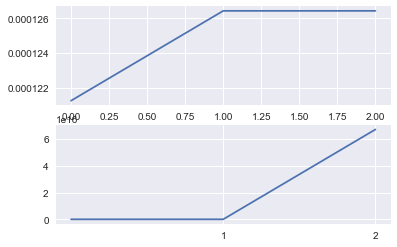

--------------------------------------------------
unitcnt
origin :  1.18843163767e-05 1.0
log :  4.3049813043e-05 1.0
log2 :  4.3049813043e-05 4.25431030051e+16


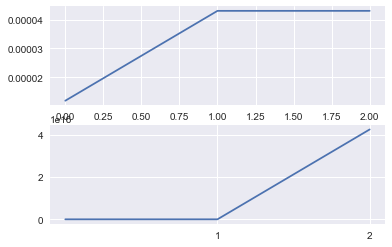

--------------------------------------------------
yardbuildingsqft17
origin :  2.11756026697e-05 1.0
log :  2.7106269026e-05 1.0
log2 :  2.7106269026e-05 2.8217065559e+16


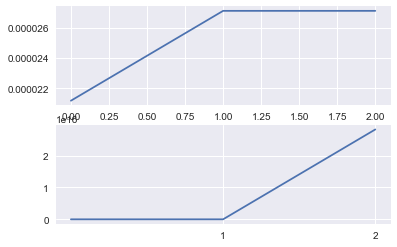

--------------------------------------------------
yardbuildingsqft26
origin :  4.6451372574e-06 1.0
log :  8.72931267437e-06 1.0
log2 :  8.72931267437e-06 2.38084623328e+16


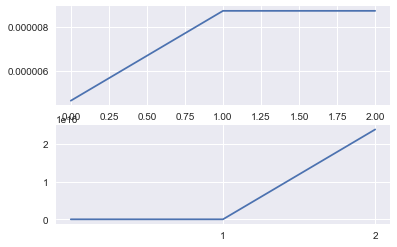

--------------------------------------------------
numberofstories
origin :  4.17758538349e-05 1.0
log :  4.06747430736e-05 1.0
log2 :  4.06747430736e-05 5.40620327503e+15


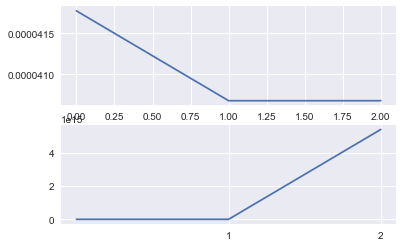

--------------------------------------------------
structuretaxvaluedollarcnt
origin :  0.000535509427942 1.0
log :  0.000306134020753 1.0
log2 :  0.000306134020753 8.53412719505e+15


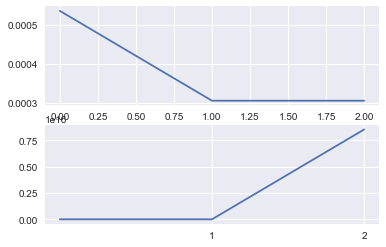

--------------------------------------------------
taxvaluedollarcnt
origin :  4.23710339261e-05 1.0
log :  8.91498384348e-06 1.0
log2 :  8.91498384326e-06 7.79228093701e+15


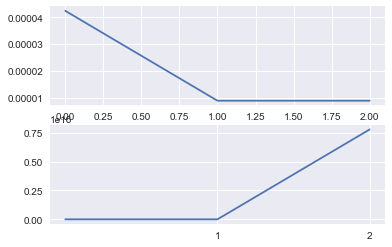

--------------------------------------------------
landtaxvaluedollarcnt
origin :  9.2174481755e-06 1.0
log :  8.31038389639e-05 1.0
log2 :  8.31038389639e-05 1.31227505923e+16


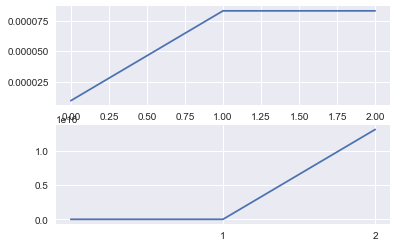

--------------------------------------------------
taxamount
origin :  4.45024961419e-05 1.0
log :  0.000791469888978 1.0
log2 :  0.000791469888978 8.0268418815e+15


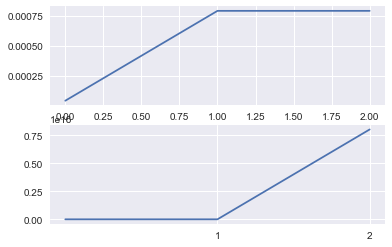

--------------------------------------------------
basementsqft
origin :  4.76137914971e-05 1.0
log :  1.73614200963e-05 1.0
log2 :  1.73614200963e-05 8.33890888492e+15


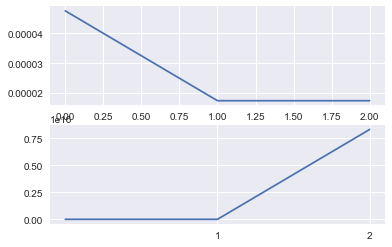

--------------------------------------------------
finishedfloor1squarefeet
origin :  3.9497863635e-05 1.0
log :  6.64472040279e-07 1.0
log2 :  6.64472040279e-07 1.34279127037e+16


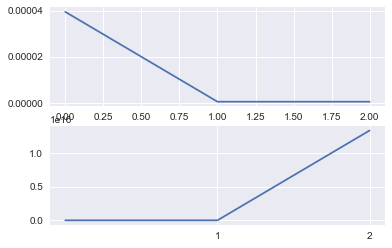

--------------------------------------------------
calculatedfinishedsquarefeet
origin :  0.0014672395085 1.0
log :  0.000825858526375 1.0
log2 :  0.000825858526375 1.06461881852e+16


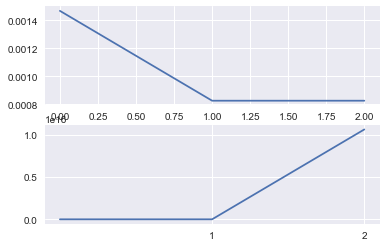

--------------------------------------------------
finishedsquarefeet50
origin :  3.14822675315e-05 1.0
log :  1.66512841959e-07 1.0
log2 :  1.66512841959e-07 1.37491973495e+16


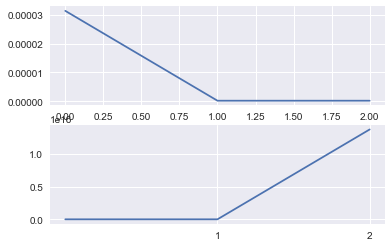

--------------------------------------------------
fireplacecnt
origin :  9.64270669501e-05 1.0
log :  7.82767868031e-05 1.0
log2 :  7.82767868031e-05 1.6580058378e+16


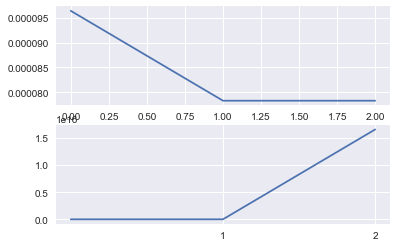

--------------------------------------------------
fullbathcnt
origin :  0.000795051654706 1.0
log :  0.000663743472263 1.0
log2 :  0.000663743472263 3.85237981265e+16


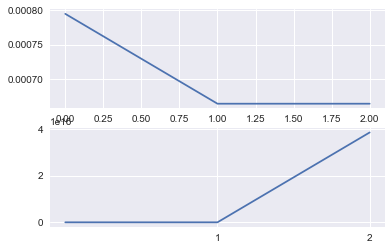

--------------------------------------------------
latitude
origin :  2.41618101793e-05 1.0
log :  2.42209599957e-05 1.0
log2 :  2.42209599959e-05 7.74304291959e+15


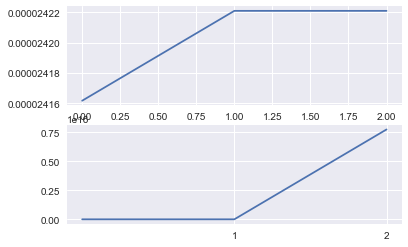

--------------------------------------------------
lotsizesquarefeet
origin :  2.28093437959e-05 1.0
log :  5.77486709706e-05 1.0
log2 :  5.77486709706e-05 1.27750232947e+16


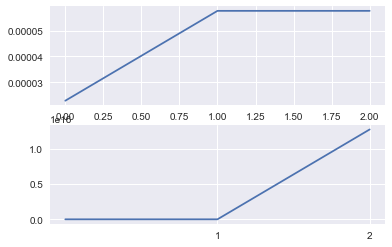

--------------------------------------------------
poolsizesum
origin :  9.17895981445e-10 1.0
log :  1.96978658829e-07 1.0
log2 :  1.96978658829e-07 9.63052470314e+15


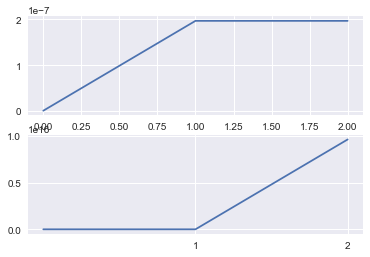

--------------------------------------------------


In [173]:
for feature in rel:
    print(feature)
    multiregression_log(feature)
    print("-" * 50)

In [ ]:
# 카테고리 feature 반영

In [ ]:
# 1. taxvaluedollarcnt : 157235.622053
# 2. poolcnt : 131221.814526
# 3. longitude : 37664.489765
# 4. latitude : 5281.925593
# 5. calculatedbathnbr : 4583.870166
# 6. basementsqft : 1653.649232
# 7. finishedfloor1squarefeet : 1554.988532
# 8. poolsizesum : 693.672687
# 9. yardbuildingsqft26 : 396.811346
# 10. calculatedfinishedsquarefeet : 296.389522


In [10]:
# 카테고리 feature 반영 (변수변환, 다항회귀)

formula = 'logerror ~ \
scale(I(bathroomcnt**1)) + scale(I(bathroomcnt**2)) + scale(I(bathroomcnt**3)) + scale(I(bathroomcnt**4)) \
+ scale(I(bedroomcnt**1)) + scale(I(bedroomcnt**2)) + scale(I(bedroomcnt**3)) + scale(I(bedroomcnt**4)) \
+ scale(I(threequarterbathnbr**1)) + scale(I(threequarterbathnbr**2)) + scale(I(threequarterbathnbr**3)) \
+ scale(I(finishedsquarefeet6**1)) + scale(I(finishedsquarefeet6**2)) \
+ scale(I(finishedsquarefeet12**1)) + scale(I(finishedsquarefeet12**2)) + scale(I(finishedsquarefeet12**3)) \
+ scale(I(finishedsquarefeet13**1)) \
+ scale(I(finishedsquarefeet15**1)) + scale(I(finishedsquarefeet15**2)) + scale(I(finishedsquarefeet15**3)) + scale(I(finishedsquarefeet15**4)) \
+ scale(I(finishedsquarefeet50**1)) + scale(I(finishedsquarefeet50**2)) + scale(I(finishedsquarefeet50**3)) \
+ scale(I(fireplacecnt**1)) + scale(I(fireplacecnt**2)) \
+ scale(I(fullbathcnt**1)) + scale(I(fullbathcnt**2)) + scale(I(fullbathcnt**3)) \
+ scale(I(garagecarcnt**1)) + scale(I(garagecarcnt**2)) + scale(I(garagecarcnt**3)) \
+ scale(I(garagetotalsqft**1)) + scale(I(garagetotalsqft**2)) + scale(I(garagetotalsqft**3)) \
+ scale(np.log(lotsizesquarefeet)) \
+ scale(I(numberofstories**1)) \
+ scale(I(roomcnt**1)) + scale(I(roomcnt**2)) \
+ scale(I(unitcnt**1)) + scale(I(unitcnt**2)) \
+ scale(np.log(yardbuildingsqft17)) \
+ scale(I(structuretaxvaluedollarcnt**1)) + scale(I(structuretaxvaluedollarcnt**2)) + scale(I(structuretaxvaluedollarcnt**3)) \
+ scale(np.log(landtaxvaluedollarcnt)) \
+ scale(np.log(taxamount)) \
+ scale(I(poolsizesum**1)) + scale(I(poolsizesum**2)) + scale(I(poolsizesum**3)) + scale(I(poolsizesum**4)) \
+ scale(parcelid) \
+ C(pooltypeid10) + C(pooltypeid2) + C(pooltypeid7) + C(storytypeid) \
+ C(airconditioningtypeid) + C(architecturalstyletypeid) + C(buildingqualitytypeid) \
+ C(buildingclasstypeid) + C(decktypeid) + C(fips) + C(heatingorsystemtypeid) \
+ C(propertycountylandusecode) + C(propertylandusetypeid) + C(regionidcounty) \
+ C(regionidcity) + C(regionidzip) + C(regionidneighborhood) + C(typeconstructiontypeid) \
+ C(yearbuilt) + C(assessmentyear) + C(taxdelinquencyyear) + C(fireplaceflag) + C(hashottuborspa) \
+ C(taxdelinquencyflag)'

model = sm.OLS.from_formula(formula, data=result_df)
result_w = model.fit()
print(result_w.rsquared)
print(result_w.summary())

0.0441674321618
                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     3.017
Date:                Fri, 06 Jul 2018   Prob (F-statistic):          8.71e-264
Time:                        14:35:43   Log-Likelihood:                 38774.
No. Observations:               90275   AIC:                        -7.482e+04
Df Residuals:                   88912   BIC:                        -6.200e+04
Df Model:                        1362                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [113]:
del result_df['propertyzoningdesc']

In [114]:
len(result_df.columns)

57

In [118]:
result_df.iloc[:, :-2].tail()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear
90270,11876798,1,nulls,646.88,3.0,4.0,nulls,4,3.0,nulls,...,2008,1.0,nulls,388582.0,596082.0,2015,207500.0,7335.81,nulls,nulls
90271,12808516,nulls,nulls,646.88,2.0,3.0,nulls,7,2.0,nulls,...,1956,1.0,nulls,86209.0,178408.0,2015,92199.0,2441.74,nulls,nulls
90272,12010248,1,nulls,646.88,2.0,2.0,nulls,4,2.0,nulls,...,2011,1.0,nulls,129000.0,420000.0,2015,291000.0,5070.41,nulls,nulls
90273,14310905,nulls,nulls,646.88,2.5,3.0,nulls,nulls,2.5,nulls,...,2012,1.0,nulls,389474.0,1215816.0,2015,826342.0,12508.30,nulls,nulls
90274,14636609,nulls,nulls,646.88,2.5,3.0,nulls,nulls,2.5,nulls,...,2013,1.0,nulls,237048.0,471286.0,2015,234238.0,5470.12,nulls,nulls


In [119]:


# y_1_test = X_1["logerror"]


,logerror
90270,0.0276
90271,-0.1188
90272,0.0843
90273,-0.0050
90274,0.0129


In [12]:
# 1. outlier idx 구하기

X_1_test = result_df.iloc[:, :-2]
y_1_test = result_df.iloc[:,-2:-1]

pred = result_w.predict(X_1_test)
influence_test = result_w.get_influence()
cooks_d2, pvals = influence_test.cooks_distance
fox_cr = 4 / (len(y_1_test) - 2)
idx = np.where(cooks_d2 > fox_cr)[0]

# 아웃라이어 index 얻기
idx = np.hstack([idx, np.where(y_1_test == 50)[0]])
idx

# 2. outlier를 제외한 idx2를 만들어서 idx2만 데이터에서 뽑기
idx2 = list(set(range(len(X_1_test))).difference(idx))
X_1_test = X_1_test.iloc[idx2, :].reset_index(drop=True)
y_1_test = y_1_test.iloc[idx2].reset_index(drop=True)

# 3. 뽑은 데이터 합치고 모델 만들기
X_o = pd.concat([y_1_test, X_1_test], axis=1, join="inner")
X_o.tail()

/Users/quartz/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:323: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)
/Users/quartz/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:323: RuntimeWarning: divide by zero encountered in true_divide
  return  self.results.resid / sigma / np.sqrt(1 - hii)
/Users/quartz/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:417: RuntimeWarning: divide by zero encountered in true_divide
  cooks_d2 *= hii / (1 - hii)
/Users/quartz/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/quartz/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/quartz/anaconda3/lib/python3.

,logerror,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
87390,0.0276,11876798,1,nulls,646.88,3.0,4.0,nulls,4,3.0,...,1.0,nulls,388582.0,596082.0,2015,207500.0,7335.81,nulls,nulls,6.0372e+13
87391,-0.1188,12808516,nulls,nulls,646.88,2.0,3.0,nulls,7,2.0,...,1.0,nulls,86209.0,178408.0,2015,92199.0,2441.74,nulls,nulls,6.03741e+13
87392,0.0843,12010248,1,nulls,646.88,2.0,2.0,nulls,4,2.0,...,1.0,nulls,129000.0,420000.0,2015,291000.0,5070.41,nulls,nulls,6.03719e+13
87393,-0.0050,14310905,nulls,nulls,646.88,2.5,3.0,nulls,nulls,2.5,...,1.0,nulls,389474.0,1215816.0,2015,826342.0,12508.30,nulls,nulls,nulls
87394,0.0129,14636609,nulls,nulls,646.88,2.5,3.0,nulls,nulls,2.5,...,1.0,nulls,237048.0,471286.0,2015,234238.0,5470.12,nulls,nulls,nulls


In [13]:
model_test = sm.OLS.from_formula(formula, data=X_o)
result_test = model_test.fit()
print(result_test.rsquared)
print(result_test.summary())

0.0644957498681
                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     4.698
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        14:58:53   Log-Likelihood:                 94512.
No. Observations:               87395   AIC:                        -1.865e+05
Df Residuals:                   86130   BIC:                        -1.746e+05
Df Model:                        1264                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [208]:
df.columns

Index(['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildin

In [207]:
y_new = result_test.predict(df)
y_new

PatsyError: Error converting data to categorical: observation with value 9.0 does not match any of the expected levels (expected: [1.0, 5.0, ..., 13.0, 'nulls'])
    logerror ~ scale(I(bathroomcnt**1)) + scale(I(bathroomcnt**2)) + scale(I(bathroomcnt**3)) + scale(I(bathroomcnt**4)) + scale(I(bedroomcnt**1)) + scale(I(bedroomcnt**2)) + scale(I(bedroomcnt**3)) + scale(I(bedroomcnt**4)) + scale(I(threequarterbathnbr**1)) + scale(I(threequarterbathnbr**2)) + scale(I(threequarterbathnbr**3)) + scale(I(finishedsquarefeet6**1)) + scale(I(finishedsquarefeet6**2)) + scale(I(finishedsquarefeet12**1)) + scale(I(finishedsquarefeet12**2)) + scale(I(finishedsquarefeet12**3)) + scale(I(finishedsquarefeet13**1)) + scale(I(finishedsquarefeet15**1)) + scale(I(finishedsquarefeet15**2)) + scale(I(finishedsquarefeet15**3)) + scale(I(finishedsquarefeet15**4)) + scale(I(finishedsquarefeet50**1)) + scale(I(finishedsquarefeet50**2)) + scale(I(finishedsquarefeet50**3)) + scale(I(fireplacecnt**1)) + scale(I(fireplacecnt**2)) + scale(I(fullbathcnt**1)) + scale(I(fullbathcnt**2)) + scale(I(fullbathcnt**3)) + scale(I(garagecarcnt**1)) + scale(I(garagecarcnt**2)) + scale(I(garagecarcnt**3)) + scale(I(garagetotalsqft**1)) + scale(I(garagetotalsqft**2)) + scale(I(garagetotalsqft**3)) + scale(np.log(lotsizesquarefeet)) + scale(I(numberofstories**1)) + scale(I(roomcnt**1)) + scale(I(roomcnt**2)) + scale(I(unitcnt**1)) + scale(I(unitcnt**2)) + scale(np.log(yardbuildingsqft17)) + scale(I(structuretaxvaluedollarcnt**1)) + scale(I(structuretaxvaluedollarcnt**2)) + scale(I(structuretaxvaluedollarcnt**3)) + scale(np.log(landtaxvaluedollarcnt)) + scale(np.log(taxamount)) + scale(np.log(poolsizesum)) + scale(I(taxvaluedollarcnt**1)) + scale(I(taxvaluedollarcnt**2)) + scale(I(taxvaluedollarcnt**3)) + scale(I(taxvaluedollarcnt**4)) + scale(I(calculatedbathnbr**1)) + scale(I(calculatedbathnbr**2)) + scale(I(calculatedbathnbr**3)) + scale(I(basementsqft**1)) + scale(I(basementsqft**2)) + scale(I(basementsqft**3)) + scale(I(finishedfloor1squarefeet**1)) + scale(I(finishedfloor1squarefeet**2)) + scale(I(poolsizesum**1)) + scale(I(poolsizesum**2)) + scale(I(poolsizesum**3)) + scale(I(poolsizesum**4)) + scale(np.log(yardbuildingsqft26)) + scale(I(calculatedfinishedsquarefeet**1)) + scale(I(calculatedfinishedsquarefeet**2)) + scale(I(calculatedfinishedsquarefeet**3)) + scale(latitude) + scale(longitude) + scale(parcelid) + C(poolcnt) + C(pooltypeid10) + C(pooltypeid2) + C(pooltypeid7) + C(storytypeid) + C(airconditioningtypeid) + C(architecturalstyletypeid) + C(buildingqualitytypeid) + C(buildingclasstypeid) + C(decktypeid) + C(fips) + C(heatingorsystemtypeid) + C(propertycountylandusecode) + C(propertylandusetypeid) + C(regionidcounty) + C(regionidcity) + C(regionidzip) + C(regionidneighborhood) + C(typeconstructiontypeid) + C(yearbuilt) + C(assessmentyear) + C(taxdelinquencyyear) + C(fireplaceflag) + C(hashottuborspa) + C(taxdelinquencyflag)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               ^^^^^^^^^^^^^^^^^^^^^^^^

In [185]:
result_df.tail()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,logerror,transactiondate
90270,11876798,1,nulls,646.88,3.0,4.0,nulls,4,3.0,nulls,...,nulls,388582.0,596082.0,2015,207500.0,7335.81,nulls,nulls,0.0276,2016-04-15
90271,12808516,nulls,nulls,646.88,2.0,3.0,nulls,7,2.0,nulls,...,nulls,86209.0,178408.0,2015,92199.0,2441.74,nulls,nulls,-0.1188,2016-06-07
90272,12010248,1,nulls,646.88,2.0,2.0,nulls,4,2.0,nulls,...,nulls,129000.0,420000.0,2015,291000.0,5070.41,nulls,nulls,0.0843,2016-06-30
90273,14310905,nulls,nulls,646.88,2.5,3.0,nulls,nulls,2.5,nulls,...,nulls,389474.0,1215816.0,2015,826342.0,12508.30,nulls,nulls,-0.0050,2016-03-31
90274,14636609,nulls,nulls,646.88,2.5,3.0,nulls,nulls,2.5,nulls,...,nulls,237048.0,471286.0,2015,234238.0,5470.12,nulls,nulls,0.0129,2016-09-13


In [192]:
result_copy = result_df.copy()
result_copy.tail()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,logerror,transactiondate
90270,11876798,1,nulls,646.88,3.0,4.0,nulls,4,3.0,nulls,...,nulls,388582.0,596082.0,2015,207500.0,7335.81,nulls,nulls,0.0276,2016-04-15
90271,12808516,nulls,nulls,646.88,2.0,3.0,nulls,7,2.0,nulls,...,nulls,86209.0,178408.0,2015,92199.0,2441.74,nulls,nulls,-0.1188,2016-06-07
90272,12010248,1,nulls,646.88,2.0,2.0,nulls,4,2.0,nulls,...,nulls,129000.0,420000.0,2015,291000.0,5070.41,nulls,nulls,0.0843,2016-06-30
90273,14310905,nulls,nulls,646.88,2.5,3.0,nulls,nulls,2.5,nulls,...,nulls,389474.0,1215816.0,2015,826342.0,12508.30,nulls,nulls,-0.0050,2016-03-31
90274,14636609,nulls,nulls,646.88,2.5,3.0,nulls,nulls,2.5,nulls,...,nulls,237048.0,471286.0,2015,234238.0,5470.12,nulls,nulls,0.0129,2016-09-13


In [193]:
# 카테고리 클래스 추리기

formula = "logerror ~ C(regionidneighborhood)"
model = sm.OLS.from_formula(formula, data=result_copy)
result = model.fit()
print(result.summary())
# sm.stats.anova_lm(model.fit())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.796
Date:                Thu, 05 Jul 2018   Prob (F-statistic):           1.31e-24
Time:                        19:59:53   Log-Likelihood:                 37179.
No. Observations:               90275   AIC:                        -7.337e+04
Df Residuals:                   89780   BIC:                        -6.871e+04
Df Model:                         494                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [200]:
pvalue = result.pvalues
type(pvalue)

pandas.core.series.Series

In [195]:
len(pvalue)

495

In [194]:
others = []
length = len(pvalue)

for i in range(length):
    if pvalue.iloc[:,-1:].values[i] > 0.01:
        idx = pvalue.index.values[i] + 1
        others.append(idx)
others

IndexingError: Too many indexers

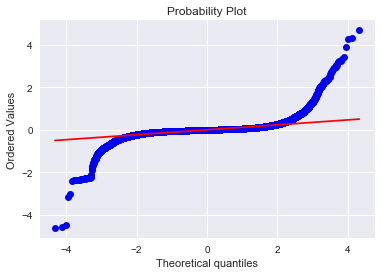

Chi^2       : 63605.320
P-value     :  0.000


In [91]:
# 잔차의 정규성 검정 (QQ plot)

sp.stats.probplot(result.resid, plot=plt)
plt.show()

test = sm.stats.stattools.omni_normtest(result.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

In [ ]:
formula = 'logerror ~ scale(bedroomcnt) \
+ scale(threequarterbathnbr) \
+ scale(finishedsquarefeet6) \
+ scale(finishedsquarefeet13) + scale(finishedsquarefeet50) \
+ scale(fireplacecnt) + scale(garagecarcnt) + scale(garagetotalsqft) \
+ scale(lotsizesquarefeet) + scale(numberofstories) \
+ scale(roomcnt) + scale(unitcnt) \
+ scale(yardbuildingsqft17) \
+ scale(landtaxvaluedollarcnt) + scale(taxamount) + scale(I(bathroomcnt**1)) + scale(I(finishedsquarefeet12**2)) \
+ scale(I(finishedsquarefeet15**3)) + scale(I(fullbathcnt**1)) + scale(I(structuretaxvaluedollarcnt**2))'
model = sm.OLS.from_formula(formula, data=result_df)
result = model.fit()
print(result.rsquared)
print(result.summary())

In [ ]:
rscore = []
condition = []

for i in range(2, 9):
    r, c = checker("structuretaxvaluedollarcnt", i)
    print(r, c)
    rscore.append(r)
    condition.append(c)

In [ ]:
N = 7

y1 = rscore
y2 = condition

plt.subplot(211)
plt.plot(y1)

plt.subplot(212)
plt.plot(y2)

plt.xticks(np.arange(1, N))
plt.show()

In [ ]:
checker("structuretaxvaluedollarcnt", 10)

In [ ]:
formula = 'logerror ~ scale(structuretaxvaluedollarcnt) + scale(I(structuretaxvaluedollarcnt ** 2)) \
+ scale(I(structuretaxvaluedollarcnt ** 3)) + scale(I(structuretaxvaluedollarcnt ** 4))\
+ scale(I(structuretaxvaluedollarcnt ** 5)) + scale(I(structuretaxvaluedollarcnt ** 6))'
model = sm.OLS.from_formula(formula, data=result_df)
result = model.fit()

print(result.rsquared)
print(result.condition_number)
print(result.summary())


In [ ]:
result_df["structuretaxvaluedollarcnt"].replace(to_replace=0.0, value=1, inplace=True)
result_df['structuretaxvaluedollarcnt'].value_counts()

In [ ]:
y = result_df['taxamount'].values
sns.distplot(y)
plt.plot()


In [ ]:
y = result_df['unitcnt'].values
sns.distplot(np.log(y**3))
# plt.xlim(0, 10)
# plt.ylim(0, 0.24)
plt.show()

In [ ]:
# finding distribution

y = result_df['structuretaxvaluedollarcnt'].values

plt.subplot(311)
sns.distplot(y)

plt.subplot(312)
sns.distplot(y + y**2)

plt.subplot(313)
sns.distplot(y + y**2 + y**3)

plt.show()

In [ ]:
# finding distribution

y = result_df['structuretaxvaluedollarcnt'].values

plt.subplot(311)
sns.distplot(y)

plt.subplot(312)
sns.distplot(np.log(y**2))

plt.subplot(313)
sns.distplot(np.logy + y**2 + y**3)

plt.show()

In [ ]:
fullbathcnt

In [ ]:
# finding distribution

y = df['fullbathcnt'].values

plt.subplot(311)
sns.distplot(y)

plt.subplot(312)
sns.distplot(y + y**2)

plt.subplot(313)
sns.distplot(y + y**2 + y**3)

plt.show()

In [ ]:
y = result_df['fullbathcnt'].values
sns.distplot(np.lonp.log(y))
plt.show()

In [ ]:
y = result_df['fullbathcnt'].values
sns.distplot(y)
plt.show()

In [ ]:
# finding distribution

y = result_df['finishedsquarefeet15'].values

plt.subplot(311)
sns.distplot(y)

plt.subplot(312)
sns.distplot(y + y**2)

plt.subplot(313)
sns.distplot(y + y**2 + y**3)

plt.show()

In [ ]:
y = result_df['finishedsquarefeet15'].values
sns.distplot(y)
plt.show()